In [1]:
import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr
import base64
from io import BytesIO
from PIL import Image

In [2]:
load_dotenv(override=True)

openai_api_key = os.getenv('OPENAI_API_KEY')
if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
MODEL = "dall-e-3" ## Different models are available for image generation
openai = OpenAI()

OpenAI API Key exists and begins sk-proj-


In [3]:
def image_generation_llm(city):

    image_response = openai.images.generate(
        model = MODEL,
        prompt=f"An image representing a vacation in {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
        size="1024x1024",
        n=1,
        response_format="b64_json"
    )

    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

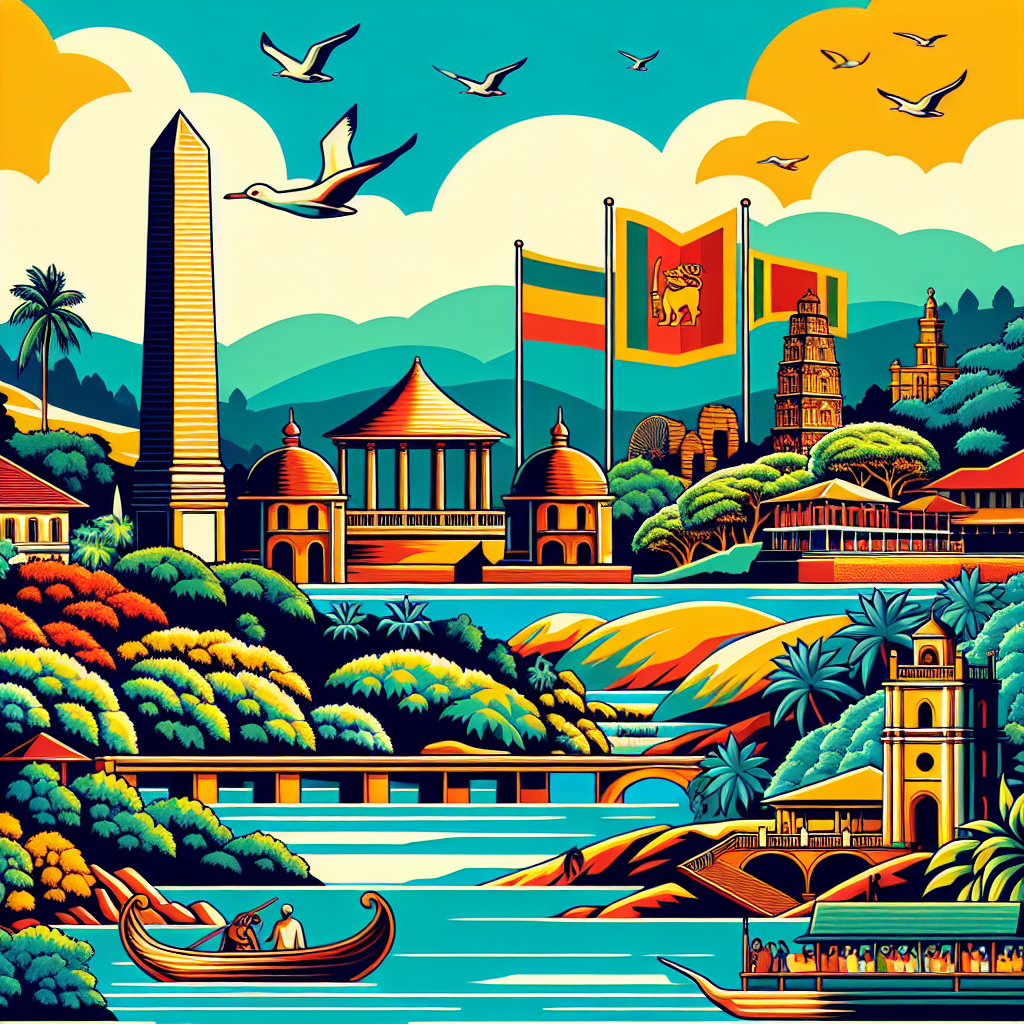

In [6]:
image_generation_llm("Kurunegala, Sri Lanka")